In [1]:
#imports
from bioreactors import logparse
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# 1-16 slots
turbi_ids = list(range(1,17))

In [14]:
# get the turbidity data points for all of them
turbi_data = {}
for turbi_id in turbi_ids:
    turbi_data_this = logparse.find_lines_with_str(
                                    patterns_str=['received turbidity reading','R'+str(turbi_id)+'='],
                                    log_folder='../../experiments-data/2019-02-26_rotation-calibration_all-vessels_more-ntus/', 
                                    data_patterns_str=['T', 'R'+str(turbi_id)])
    turbi_times = [r['T'] for r in turbi_data_this]
    turbi_readings = [r['R'+str(turbi_id)] for r in turbi_data_this]
    avg_readings_all = []
    for i in range(int(len(turbi_readings)/8)):
        avg_readings_all.append(np.mean(np.array(turbi_readings[8*i:8*(i+1)])))        
    turbi_data[turbi_id] = {'all':np.array(avg_readings_all)}

In [15]:
# compute the real ntu for each turbi
real_ntus = {turbi_id:[] for turbi_id in turbi_ids}
real_ntu_base = list(range(600,3680,280)) + [0,0,0,0,0]
for i in range(len(real_ntu_base)):
    for turbi_id in turbi_ids:
        real_ntus[turbi_id].append(real_ntu_base[turbi_id-1])
    real_ntu_base = real_ntu_base[-1:] + real_ntu_base[:-1]
for turbi_id in turbi_ids:
    real_ntus[turbi_id] = np.array(real_ntus[turbi_id])

In [16]:
# account for the fact that tube switch messup in position 13 and 14 for t=10
turbi_data[13]['all'] = np.delete(turbi_data[13]['all'], 10)
real_ntus[13] = np.delete(real_ntus[13], 10)
turbi_data[14]['all'] = np.delete(turbi_data[14]['all'], 10)
real_ntus[14] = np.delete(real_ntus[14], 10)

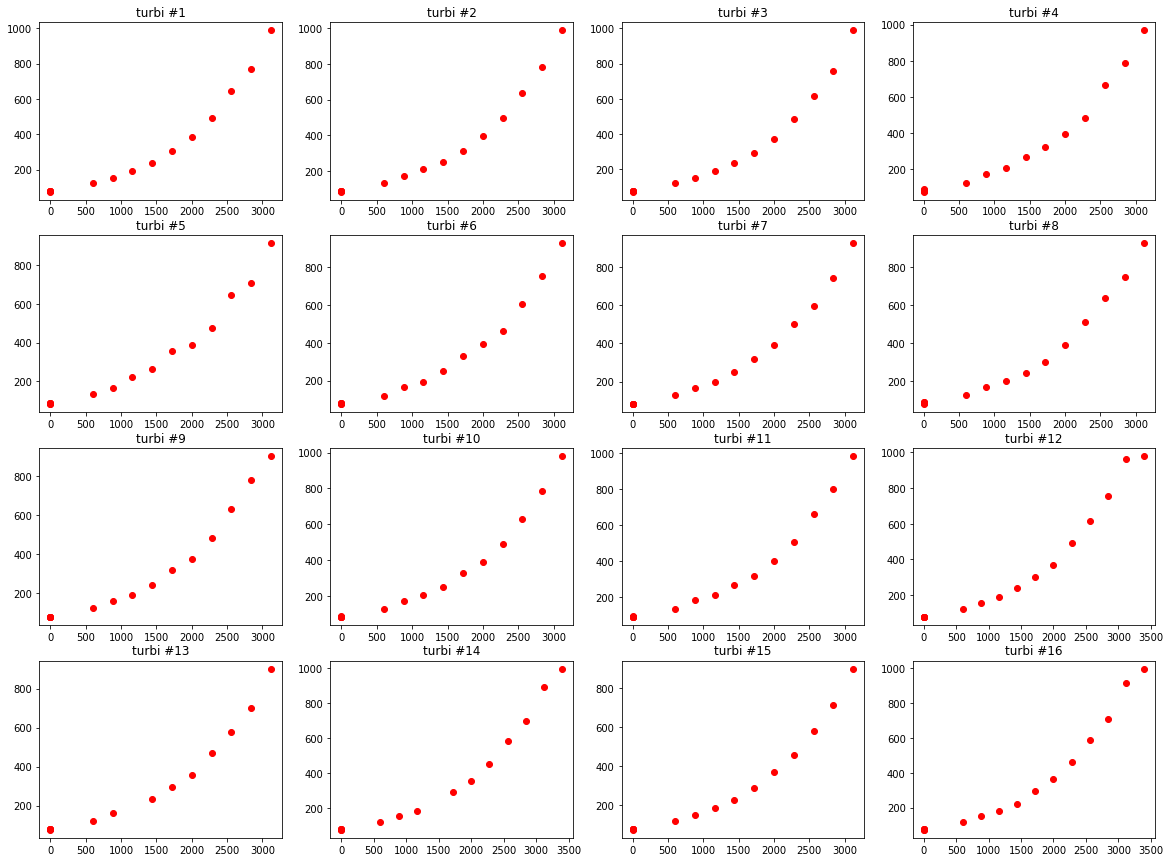

In [17]:
plt.figure(figsize=(20,15))
for index,turbi_id in enumerate(turbi_ids):
    ax = plt.subplot(4,4,index+1)
    plt.plot(real_ntus[turbi_id][turbi_data[turbi_id]['all']<1000],
             turbi_data[turbi_id]['all'][turbi_data[turbi_id]['all']<1000],'ro')
    plt.title('turbi #%i'%turbi_id)

In [21]:
import pandas as pd
for turbi_id in turbi_ids:
    data = {'readings':turbi_data[turbi_id]['all'], 'ntu':real_ntus[turbi_id]}
    df = pd.DataFrame.from_dict(data)
    df = df[df['readings']<1023]
    df = df.sort_values(by=['ntu'])
    df.to_csv('calib-data/calib-data-more-ntus_vessel-slot-'+str(turbi_id)+'.csv')